In [1]:
%%html
<h1>1.1 Ex. 1</h1>

In [19]:
#pyod.utils.data.generate_data_clusters -> gen clusters of synth data
#sklearn.datasets.make_blobs -> clustere cu matrice d-aia
#scipy.io.loadmat -> loads matrix from matlab
#pyod.utils.utility.standardizer -> standardizare medie 0 dev std 1
#pyod.models.combination.average -> average of outlier scores
#pyod.models.combination.maximization -> takes maximum score
#numpy.quantile -> calculeaza a q a cuantila dupa o axa si un input
import numpy as np
import matplotlib.pyplot as plt

In [14]:
class Random1DLiniarModelGenerator():
    mu_x: float
    sigma_x: float
    mu_y: float
    sigma_y: float
    a: int
    b: int

    def __init__(self, mu_x, sigma_x, mu_y, sigma_y, a, b):
        self.mu_x = mu_x
        self.sigma_x = sigma_x
        self.mu_y = mu_y
        self.sigma_y = sigma_y
        self.a = a
        self.b = b
        
    def generate_sample(self):
        epsilon = np.random.normal(loc=self.mu_y, scale=self.sigma_y**2)
        x = np.random.normal(loc=self.mu_x, scale=self.sigma_x) 
        return (x, self.a * x + self.b + epsilon)

    def generate_n_samples(self, n):
        samples = np.array([self.generate_sample() for _ in range(n)])
        return samples
        
    

In [88]:
generator_low_noise = Random1DLiniarModelGenerator(mu_x = 0, sigma_x = 1, mu_y = 0, sigma_y = 1, a = 2, b = 3)
generate_high_variance_x = Random1DLiniarModelGenerator(mu_x = 0, sigma_x = 5, mu_y = 0, sigma_y = 1, a = 2, b = 3)
generate_high_variance_y = Random1DLiniarModelGenerator(mu_x = 0, sigma_x = 1, mu_y = 0, sigma_y = 5, a = 2, b = 3)
generate_high_variance_x_y = Random1DLiniarModelGenerator(mu_x = 0, sigma_x = 5, mu_y = 0, sigma_y = 5, a = 2 , b = 3)

n_samples = 100
low_noise_points = generator_low_noise.generate_n_samples(n = n_samples)
high_variance_x_points = generate_high_variance_x.generate_n_samples(n = n_samples)
high_variance_y_points = generate_high_variance_y.generate_n_samples(n = n_samples)
high_variance_x_y_points = generate_high_variance_x_y.generate_n_samples(n = n_samples)

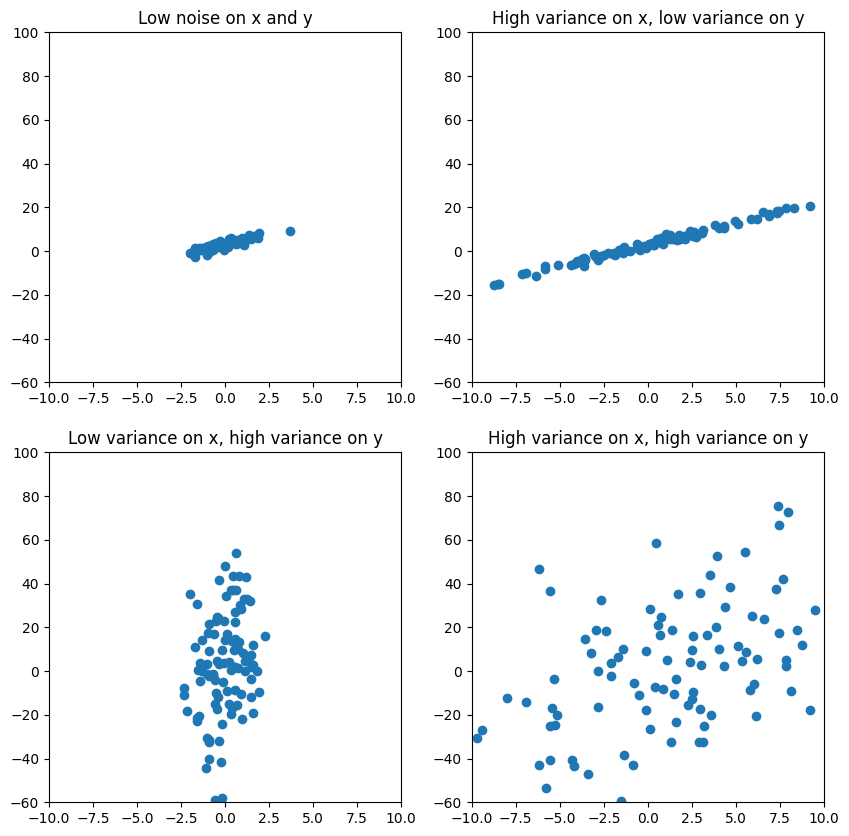

In [96]:
fig, plots = plt.subplots(2, 2, figsize=(10, 10))
plots.ravel()
plots[0, 0].scatter(low_noise_points[:, 0], low_noise_points[:, 1])
plots[0, 0].set_title("Low noise on x and y")
plots[0, 1].scatter(high_variance_x_points[:, 0], high_variance_x_points[:, 1])
plots[0, 1].set_title("High variance on x, low variance on y")
plots[1, 0].scatter(high_variance_y_points[:, 0], high_variance_y_points[:, 1])
plots[1, 0].set_title("Low variance on x, high variance on y")
plots[1, 1].scatter(high_variance_x_y_points[:, 0], high_variance_x_y_points[:, 1])
plots[1, 1].set_title("High variance on x, high variance on y")

for x, y in zip([0, 0, 1, 1], [0, 1, 0, 1]):
    plots[x, y].set_xlim(-10, 10)
    plots[x, y].set_ylim(-60, 100)

plt.show()

In [100]:
%%html
<h1> TODO: Compute leverage scores</h1>
<h2> Using X = U*sigma*V^T and not X(X^T X)^T X^T</h2>
<h3> Use the SVD algorith</h3>